In [10]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr 


/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr


In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from accesspr import *
import scipy.interpolate as scint
from prPlottingFunctions import *
import platereader as pr
%matplotlib inline


In [12]:
#colors used to plot strains
strainColors={'MoClo.pADH2e2': '#807dba',                             
'MoClo.pGAL3': '#a42446',
'MoClo.pHXT1': '#ee564e',
'MoClo.pHXT4': '#8dd3c7',
'MoClo.pHXT4M001': '#ffffb3',
'MoClo.pHXT4R001': '#bebada',
'MoClo.pHXT4R005': '#fb8072',
'MoClo.pHXT4R007': '#80b1d3',
'MoClo.pREV1': '#1d5c00',
'MoClo.pSTRE': '#d9d9d9',
'WT': '#8acd4a', 
'MoClo.pGAL1': '#d0c389',                               
'MoClo.pGAL10': '#32e2e2',          
'MoClo.pHXT4D004': '#fdb462',
'MoClo.pHXT4R004': '#b3de69',
'MoClo.pHXT5': '#a106d3',    
'MoClo.pHXT6': '#5b700d',    
'MoClo.pRPL18B': '#68ce34',  
'MoClo.pSUC2': '#68ce34',  
'MoClo.pTDH3': '#68a6e9',
'WT': '#301499',
'MoClo.pHXT4R008': '#bc80bd',
'MoClo.pHXT4D001': '#848d77',
'MoClo.pHXT1e1': '#ee564e',
'MoClo.pGAL7':ppf.randomColor() }



blueColors=['#f7fcf0',
'#e0f3db',
'#ccebc5',
'#a8ddb5',
'#7bccc4',
'#4eb3d3',
'#2b8cbe',
'#08589e']

magentaColors=['#fff7f3',
'#fde0dd',
'#fcc5c0',
'#fa9fb5',
'#f768a1',
'#dd3497',
'#ae017e',
'#7a0177']

redColors=['#ffffcc',
'#ffeda0',
'#fed976',
'#feb24c',
'#fd8d3c',
'#fc4e2a',
'#e31a1c',
'#b10026'
]
purpleColors=['#fcfbfd',
'#efedf5',
'#dadaeb',
'#bcbddc',
'#9e9ac8',
'#807dba',
'#6a51a3',
'#4a1486']

greyColors=['#ffffff',
'#f0f0f0',
'#d9d9d9',
'#bdbdbd',
'#969696',
'#737373',
'#525252',
'#252525'
]

cyanColors=['#ffffe5',
'#f7fcb9',
'#d9f0a3',
'#addd8e',
'#78c679',
'#41ab5d',
'#238443',
'#005a32']

greenColors=['#ffffe5',
'#f7fcb9',
'#d9f0a3',
'#addd8e',
'#78c679',
'#41ab5d',
'#238443',
'#005a32']


def createPatches(colorDict, loc='upper right'):
    patches=[];
    patches= [[pch.Patch(color=c)for c in colorDict[j]] for j in colorDict.keys() ]
    lgnds= list(colorDict.keys())
    return patches
    #plt.figlegend(patches, lgnds, loc)
#for st in xpr.allStrains:
#    plt.figure()
#    for md in xpr.allMedia:
#        xpr.plotRawReplicates(md, st, dtype='GFP80')
#createPatches(strainColors)

In [13]:
pickleFileFolder='/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/allPicklesMoClo'
#dealing with only the GFP70 experiments
#xpr=ac.accesspr(pickleFileFolder, FL='GFP80', FLperod='c-GFP80perod', ignoreFiles=['p201703181_80.pkl', 'p201703181.pkl', 'p20170307.pkl','p201703182.pkl','p20170319.pkl','p20170320.pkl'])
xpr=ac.accesspr(pickleFileFolder, FL='GFP80', FLperod='c-GFP80perod',ignoreFiles=['p201703181_80.pkl']) #importing all files
#xpr.containsstat('transformedGFP70')
###only experiments run on PR2
#xpr=ac.accesspr(pickleFileFolder, FL='GFP80', FLperod='c-GFP80perod', ignoreFiles=['p201703181.pkl','p201703181_80.pkl', 'p20170331.pkl','p201704011.pkl'])
#xpr.alignAll(rerun=True)
#xpr.containsstat('Time centered at gr peak')

print(xpr.FL)

#xpr.containsstat('c-transformedGFP70perod')
print(xpr.statContents)



trying to open  p20170307.pkl
trying to open  p201703181.pkl
trying to open  p201703182.pkl
trying to open  p20170319.pkl
trying to open  p20170320.pkl
trying to open  p20170331.pkl
trying to open  p201704011.pkl

 Adding GFP80 as a consensus. Please correct autofluorescence using this channel.
aligning experiment  p20170320.pkl
aligning experiment  p20170307.pkl
aligning experiment  p20170319.pkl
aligning experiment  p201704011.pkl
aligning experiment  p201703181.pkl
aligning experiment  p201703182.pkl
aligning experiment  p20170331.pkl
Experiments aligned successfully.
experiment p20170320.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170307.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170319.pkl lacking machine attribute. Attempting retrieval from file...
experiment p201704011.pkl lacking machine attribute. Attempting retrieval from file...
experiment p201703182.pkl lacking machine attribute. Attempting retrieval fro

In [19]:
np.isnan(xpr.statContents.loc['p201704011.pkl', 'GFP70'])

False

In [7]:
##generating an overlay plot with the ODs and the specific FLperod we want
#try:
#    xpr.data['p201703181.pkl'].correctauto(f=['GFP80', 'AutoFL'], refstrain='WT')
#except:
#    xpr.data['p201703181.pkl'].correctauto(f=['GFP80', 'AutoFL'], refstrain='WT')

xpr.findMachines()
xpr.machines
#xpr.data
#for expt in xpr.allExperiments:
#xl= pd.ExcelFile(xpr.data[expt].wdir + xpr.data[expt].dname)
#df= xl.parse(0)
#print(df.head(10))

    
#    plt.figure()
#    ppf.transformEach(xpr.data[expt], stat1='GFP70', stat2='GFP80', plot=True)  
#flfield='transformedGFP70'



experiment p20170320.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170307.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170319.pkl lacking machine attribute. Attempting retrieval from file...
experiment p201704011.pkl lacking machine attribute. Attempting retrieval from file...
experiment p201703182.pkl lacking machine attribute. Attempting retrieval from file...
experiment p20170331.pkl lacking machine attribute. Attempting retrieval from file...


{'p20170307.pkl': 'Plate Reader 2',
 'p201703181.pkl': 'Plate Reader 1',
 'p201703182.pkl': 'Plate Reader 2',
 'p20170319.pkl': 'Plate Reader 2',
 'p20170320.pkl': 'Plate Reader 2',
 'p20170331.pkl': 'Plate Reader 1',
 'p201704011.pkl': 'Plate Reader 1'}

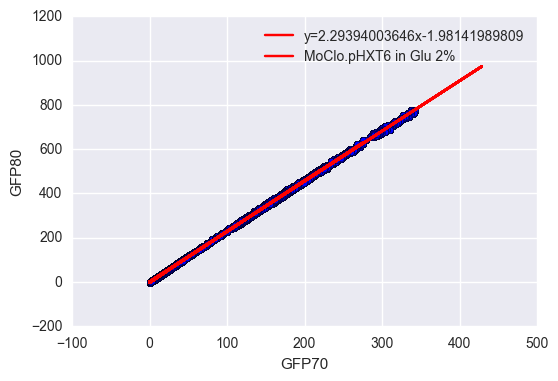

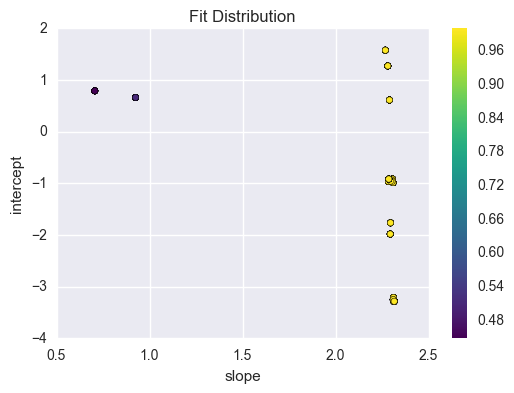

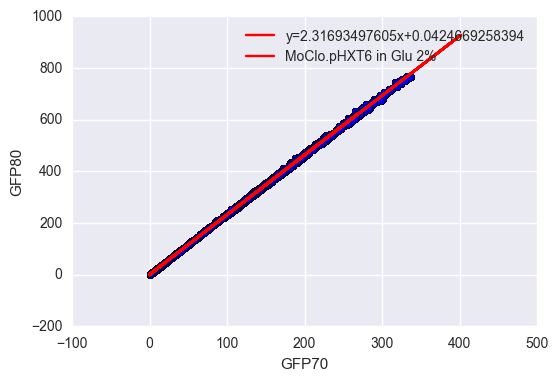

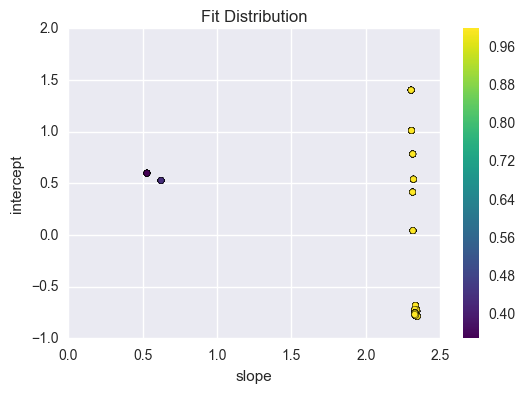

In [21]:
for expt in xpr.allExperiments:
    plt.figure()
    #xl= pd.ExcelFile(xpr.data[expt].wdir + xpr.data[expt].dname)
    if np.isnan(xpr.statContents.loc[expt, 'GFP70'])==False:
        transformEach(xpr.data[expt], stat1='GFP70', stat2='GFP80', plot=True)  
flfield='transformedGFP70'



for expt in xpr.allExperiments:
    pth=xpr.data[expt].wdir + xpr.data[expt].dname    
    xl= pd.ExcelFile(pth)
    df= xl.parse(0)
    #print(df.head(10))
    xpr.prtype
    snField=df.keys()[['Tecan i-control 'in j for j in df.keys()]][0]
    snField
    xpr.serialnumbers[expt]=df[snField][0].split('Serial number: ')[1] 
    if xpr.serialnumbers[expt]=='1006006292':
        xpr.machines[expt]='Plate Reader 1'
    else:
        if xpr.serialnumbers[expt]=='1411011275':
            xpr.machines[expt]='Plate Reader 2'
        else:
            xpr.machines[expt]='unknown'
                #except:
                #    print('could not extract machine info from source file. Machine left unknown.')					
                #   self.machines[expt]= np.nan


In [6]:
###Now we replace the GFP80 channel with the transformed GFP70 in order to fill in nans present in GFP80 at the cost of some increase in noisiness.
###we store the originalGFP80 as a backup.
#WARNING: before you run this code it is advised that you rerun the whole script to import the original data.
for expt in xpr.allExperiments:
    for md in xpr.data[expt].d.keys():
        for strn in xpr.data[expt].d[md].keys():
            xpr.data[expt].d[md][strn]['GFP80original']=xpr.data[expt].d[md][strn]['GFP80']
            xpr.data[expt].d[md][strn]['GFP80']=xpr.data[expt].d[md][strn]['transformedGFP70']





KeyError: 'transformedGFP70'

KeyError: 'GFP80original'

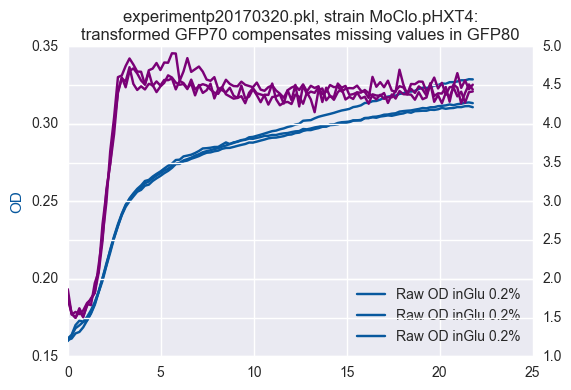

In [14]:
#with these plots we prove that we can find a near perfect linear transformation of GFP70 into GFP80
flfield='GFP80'
for expt in xpr.allExperiments:
    if np.isnan(xpr.statContents.loc[expt, 'GFP70'])==True:
        continue
    exptstr=expt
    expt=xpr.data[expt]
    mc= colorDict(list(expt.d.keys())) ###media colors
    for strn in expt.allstrains:
        if strn in ['WT', 'null']:
            continue
        plt.figure(); 
        plt.title('experiment'+exptstr+', strain ' +strn+':\ntransformed GFP70 compensates missing values in GFP80')
        axOD=plt.gca()
        axGFP=axOD.twinx()
        plt.axis('normal')
        k=-1;
        for media in expt.d.keys():	
            axOD.plot(expt.d[media][strn]['time'],expt.d[media][strn]['OD'], color=blueColors[k], label='Raw OD in'+media)
            axOD.legend(loc=4)
            axOD.set_ylabel('OD', color=blueColors[k])
            axGFP.plot(expt.d[media][strn]['time'],expt.d[media][strn][flfield], color=magentaColors[k], label='transformed GFP70'+' in '+media )
            axGFP.plot(expt.d[media][strn]['time'],expt.d[media][strn]['GFP80original'], color='red', label='GFP80original'+' in '+media )
            axGFP.legend(loc=2)
            axGFP.set_ylabel(flfield, color=magentaColors[k])
            k-=1
        

In [ ]:
plt.figure(); 
flfield='c-GFP80perod'
strn='MoClo.pADH2e2'
lgnds=[]
patches=[]
cols=ppf.randomColors(10)
k=0
for md in xpr.allMedia:
    xpr.plotReplicateMean(md, strn, dtype='c-GFP80perod', col=cols[k])
    lgnds.append(md)
    patches.append(pch.Patch(color=cols[k]))
    k+=1
    
plt.ylabel('GFP80 per OD')
plt.xlabel('Time relative to growth rate peak (hrs)')
#plt.legend('Glu 0.2%', 'Glu 2%')
#createPatches({'Glu 0.2%': purpleColors[-1],'Glu 2%': purpleColors[-4]})
#plotRawReplicates
#plt.plot(expt.d[media][strn]['time'],expt.d['Glu 0.2%'][strn][flfield], color=magentaColors[k], label=flfield+' in '+media )
#plt.plot(expt.d[media][strn]['time'],expt.d['Glu 2%'][strn][flfield], color=magentaColors[k], label=flfield+' in '+media )
plt.figlegend(patches, lgnds, 'upper right')

In [ ]:
fixedcols=cols
flfield='c-GFP80perod'
strn='MoClo.pHXT1e1'
lgnds=[]
patches=[]
k=0
for md in xpr.allMedia:
    xpr.plotReplicateMean(md, strn, dtype='c-GFP80perod', col=cols[k])
    lgnds.append(md)
    patches.append(pch.Patch(color=cols[k]))
    k+=1
    
plt.ylabel('GFP80 per OD')
plt.xlabel('Time relative to growth rate peak (hrs)')
#plt.legend('Glu 0.2%', 'Glu 2%')
#createPatches({'Glu 0.2%': purpleColors[-1],'Glu 2%': purpleColors[-4]})
#plotRawReplicates
#plt.plot(expt.d[media][strn]['time'],expt.d['Glu 0.2%'][strn][flfield], color=magentaColors[k], label=flfield+' in '+media )
#plt.plot(expt.d[media][strn]['time'],expt.d['Glu 2%'][strn][flfield], color=magentaColors[k], label=flfield+' in '+media )
plt.figlegend(patches, lgnds, 'upper right')

In [ ]:
plt.figure(); 
flfield='c-GFP80perod'
md='Glu 2%'
lgnds=[]
patches=[]
h4cols=ppf.randomColors(10)
k=0
for strn in ['MoClo.pHXT4','MoClo.pHXT4R001']:
    xpr.plotReplicateMean('Glu 2%', strn, dtype='c-GFP80perod', col=h4cols[k])
    if strn=='MoClo.pHXT4':
        lgnds.append('WT')
    else:
        lgnds.append(strn.split('pHXT4')[1])
    patches.append(pch.Patch(color=h4cols[k]))
    k+=1
    
plt.ylabel('GFP80 per OD. '+md)
plt.xlabel('Time relative to growth rate peak (hrs)')
#plt.legend('Glu 0.2%', 'Glu 2%')
#createPatches({'Glu 0.2%': purpleColors[-1],'Glu 2%': purpleColors[-4]})
#plotRawReplicates
#plt.plot(expt.d[media][strn]['time'],expt.d['Glu 0.2%'][strn][flfield], color=magentaColors[k], label=flfield+' in '+media )
#plt.plot(expt.d[media][strn]['time'],expt.d['Glu 2%'][strn][flfield], color=magentaColors[k], label=flfield+' in '+media )
plt.figlegend(patches, lgnds, 'upper right')

There is no good consensus fluorescence other than GFP80, but at the same time some of these experiments were measured in plate reader 1 while others were measured in platereader 2. we attempt to find a line description that indicates plate reader type. 
Finding the plate reader machine identifiers to include them in accesspr

In [ ]:
homedir= '/Users/s1259407'
dropboxPath='/Dropbox/PhD/phd_peter_swain/data/plate_reader_data'
#the experiment below was run in plate reader 1
mydir20170331= homedir+dropboxPath+'/20170331_LuisEmilyPromotersPR1SUC'     
p20170331=pr.platereader(mydir20170331+'/20170331_LuisEmilyPromotersPR1SUC.xlsx', mydir20170331+'/20170331contents.xls')
#the experiment below was run in plate reader 2
mydir20170319= homedir+dropboxPath+'/20170319_LuisEmilyPromotersBatch2'     
p20170319=pr.platereader(mydir20170319+'/20170319_LuisEmilyPromoters_Batch2.xlsx', mydir20170319+'/20170319contents.xls')
##loading a sample dataset
xl1= pd.ExcelFile(mydir20170331+'/20170331_LuisEmilyPromotersPR1SUC.xlsx')
df= xl1.parse()
df.head(20) ###this lets us find the field that containst the serial number of the machine
#print('serial number of PR1: ', df['Tecan i-control , 1.10.4.0'][0].split('Serial number: ')[1] )##serial number of plate reader 1
xl2=pd.ExcelFile(mydir20170319+'/20170319_LuisEmilyPromoters_Batch2.xlsx')
df= xl2.parse()
df.head(20)
##it seems that the i-control version is different for both plate reader accounts :S :S :S :S!
##we have to then work arounf by finding the field that contains the i control inscription
snField=df.keys()[['Tecan i-control 'in j for j in df.keys()]][0] #ths gives us the name of the 'infinite' field
#print('serial number of PR2: ', df[snField][0].split('Serial number: ')[1] )##serial number of plate reader 1

#now we implement this information in a new attribute called pr.machine for the plate reader.
print(p20170331.machine)
print(p20170319.machine)

In [ ]:
#colors used to plot strains
strainColors={'MoClo.pADH2e2': '#807dba',                             
'MoClo.pGAL3': '#a42446',
'MoClo.pHXT1': '#ee564e',
'MoClo.pHXT4': '#8dd3c7',
'MoClo.pHXT4M001': '#ffffb3',
'MoClo.pHXT4R001': '#bebada',
'MoClo.pHXT4R005': '#fb8072',
'MoClo.pHXT4R007': '#80b1d3',
'MoClo.pREV1': '#1d5c00',
'MoClo.pSTRE': '#d9d9d9',
'WT': '#8acd4a', 
'MoClo.pGAL1': '#d0c389',                               
'MoClo.pGAL10': '#32e2e2',          
'MoClo.pHXT4D004': '#fdb462',
'MoClo.pHXT4R004': '#b3de69',
'MoClo.pHXT5': '#a106d3',    
'MoClo.pHXT6': '#5b700d',    
'MoClo.pRPL18B': '#68ce34',  
'MoClo.pSUC2': '#68ce34',  
'MoClo.pTDH3': '#68a6e9',
'WT': '#301499',
'MoClo.pHXT4R008': '#bc80bd',
'MoClo.pHXT4D001': '#848d77',
'MoClo.pHXT1e1': '#ee564e',
'MoClo.pGAL7':ppf.randomColor() }



blueColors=['#f7fcf0',
'#e0f3db',
'#ccebc5',
'#a8ddb5',
'#7bccc4',
'#4eb3d3',
'#2b8cbe',
'#08589e']

magentaColors=['#fff7f3',
'#fde0dd',
'#fcc5c0',
'#fa9fb5',
'#f768a1',
'#dd3497',
'#ae017e',
'#7a0177']

redColors=['#ffffcc',
'#ffeda0',
'#fed976',
'#feb24c',
'#fd8d3c',
'#fc4e2a',
'#e31a1c',
'#b10026'
]
purpleColors=['#fcfbfd',
'#efedf5',
'#dadaeb',
'#bcbddc',
'#9e9ac8',
'#807dba',
'#6a51a3',
'#4a1486']

greyColors=['#ffffff',
'#f0f0f0',
'#d9d9d9',
'#bdbdbd',
'#969696',
'#737373',
'#525252',
'#252525'
]

cyanColors=['#ffffe5',
'#f7fcb9',
'#d9f0a3',
'#addd8e',
'#78c679',
'#41ab5d',
'#238443',
'#005a32']

greenColors=['#ffffe5',
'#f7fcb9',
'#d9f0a3',
'#addd8e',
'#78c679',
'#41ab5d',
'#238443',
'#005a32']

#for st in xpr.allStrains:
#    plt.figure()
#    for md in xpr.allMedia:
#        xpr.plotRawReplicates(md, st, dtype='GFP80')
        

In [ ]:
plt.figure()
md='Glu 2%'
dtype='sc-GFP80perod'; media=md; strn='MoClo.pADH2e2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pRPL18B'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT5'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
#dtype='c-GFP80perod'; media=md; strn='MoClo.pHXT6'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT1e1'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pTDH3'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pSTRE'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=randomColor(), normalise=True)
plt.xlabel('centered Time in hrs (0= t_maxGR)')
plt.ylabel('relative GFP perod')
plt.legend(loc=4)
plt.ylim([-.1, 1])
plt.xlim([-3, 15])

In [ ]:
plt.figure()
md='Glu 2%'
xcl=11
dtype='sc-GFP80perod'; media=md; strn='MoClo.pADH2e2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pRPL18B'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT5'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors['MoClo.pHXT6'], normalise=True, excludeFirst=xcl)
#dtype='sc-GFP80perod'; media=md; strn='MoClo.pSTRE'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT1e1'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
plt.title('Timing of promoters in 2% glucose')
plt.ylabel('GFP FL per OD (AU)')
plt.xlabel('Time relative to growth rate peak time (hrs)')
plt.legend(loc=4)
#dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
xcl=0
plt.figure()
md='SucGlu 1%'
xcl=11
dtype='c-GFP80perod'; media=md; strn='MoClo.pADH2e2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
#dtype='sc-GFP80perod'; media=md; strn='MoClo.pRPL18B'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT5'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors['MoClo.pHXT6'], normalise=True, excludeFirst=xcl)
#dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT6'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT1e1'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
plt.title('Timing of promoters in 1% glucose/1% Sucrose')
plt.ylabel('GFP FL per OD (AU)')
plt.xlabel('Time relative to growth rate peak time (hrs)')
plt.legend(loc=4)
plt.figure()
md='Glu 0.2%'
xcl=11
#dtype='c-GFP80perod'; media=md; strn='MoClo.pADH2e2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
#dtype='sc-GFP80perod'; media=md; strn='MoClo.pRPL18B'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT5'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors['MoClo.pHXT6'], normalise=True, excludeFirst=xcl)
#dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT6'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media=md; strn='MoClo.pHXT1e1'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=strainColors[strn], normalise=True, excludeFirst=xcl)
plt.title('Timing of promoters in 0.2% Glucose')
plt.ylabel('GFP FL per OD (AU)')
plt.xlabel('Time relative to growth rate peak time (hrs)')
plt.legend(loc=4)



plt.figure()

dtype='sc-GFP80perod'; media='Glu 2%'; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=greenColors[-1], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media='SucGlu 1%'; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=greenColors[-3], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media='Glu 0.2%'; strn='MoClo.pSUC2'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=greenColors[-5], normalise=True, excludeFirst=xcl)
plt.title('Timing of pSUC2 in all Sugars')
plt.ylabel('GFP FL per OD (AU)')
plt.xlabel('Time relative to growth rate peak time (hrs)')
plt.legend(loc=4)
plt.figure()

dtype='sc-GFP80perod'; media='Glu 2%'; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=blueColors[-1], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media='SucGlu 1%'; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=blueColors[-3], normalise=True, excludeFirst=xcl)
dtype='sc-GFP80perod'; media='Glu 0.2%'; strn='MoClo.pHXT4'; xpr.plotReplicateMean( media, strn, dtype=dtype, col=blueColors[-5], normalise=True, excludeFirst=xcl)
plt.title('Timing of pHXT4 in all Sugars')
plt.ylabel('GFP FL per OD (AU)')
plt.xlabel('Time relative to growth rate peak time (hrs)')
plt.legend(loc=4)

In [ ]:
df=xpr.extractAllInfo()
df

In [ ]:
#dataframes that come from only one type of plate reader for practice purposes
df1=df[df['machine']=='Plate Reader 1']
df2=df[df['machine']=='Plate Reader 2']
sns.factorplot('media', 'FLPeak', data=df, hue='machine')

In [7]:
times=[0,2,4,6,8,10,12,14]
timedf=xpr.timeStatAll(times=times, dtype='GFP80')
timedf
tidydf=pd.melt(timedf, id_vars=['experiment', 'machine', 'media', 'strain'], value_vars=times, var_name='time', value_name='GFP80')
#sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pHXT4']))
#sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pHXT4R001']))
#sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pSTRE']))
ts=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pSTRE'])
groupVariable='machine'
targetVariable='GFP80'
group='Plate Reader 1'
print(tidydf[targetVariable][tidydf[groupVariable]==group])
print(tidydf[targetVariable][tidydf[groupVariable]==group]*2.2)
print(tidydf[targetVariable][tidydf[groupVariable]==group])

10       0.634644
17      0.0346442
31        21.3963
33        18.8472
35       0.458826
37       -1.73922
42       0.796149
43       0.643201
45       -1.76734
51       0.196149
52      0.0213258
55       -2.19547
57         1.1682
59       -1.01734
65       0.124451
67       -2.12359
69       0.440894
72        2.72527
75        26.1784
78      0.0565192
81         3.3961
84        3.32839
87       0.125269
90      0.0283942
93        44.6815
96       0.602399
99        2.99302
100       3.65258
102      0.754534
104       28.4461
          ...    
1225      7.04395
1227      3.89003
1229      2.95173
1232      390.187
1233      420.303
1235      403.505
1236      27.2071
1237      29.7413
1238          NaN
1239          NaN
1240      357.812
1241      387.111
1242      5.47594
1243      5.92983
1244      43.7453
1245      30.0925
1246      28.5042
1247      13.2113
1248      12.6884
1249      2.83561
1250      3.06661
1251      13.5964
1252      12.0298
1253      536.125
1254      

In [ ]:
sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pHXT4']))
sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pHXT4R001']))
sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf, 'strain',[ 'MoClo.pSTRE']))
tidydf2=ac.DFTransform(tidydf, 'GFP80', groupVariable='machine',group='Plate Reader 1', scale=2.2, shift=1 )

sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf2, 'strain',[ 'MoClo.pHXT4']))
sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf2, 'strain',[ 'MoClo.pHXT4R001']))
sns.factorplot('time', 'GFP80', col='media', hue='machine', data=ac.DFsubset(tidydf2, 'strain',[ 'MoClo.pSTRE']))


###for some stupid reason tidydf is being modified inside the function, despite the 17 changes to it. 
#what is most surprising is that the input df is actually set to 0, so tidy df should be made 0 as well, but it doesn't.